In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import os
from itertools import zip_longest

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from dogo.results import get_results, get_experiment_details, average_scores_over_seeds
from dogo.plot_results import plot_experiment_metrics, plot_min_max_logvars, plot_grouped_evaluation_returns, plot_min_max_penalty

In [3]:
plt.rc('font', size=12)

In [4]:
# No REx
MP329 = get_results("MP329")
MP330 = get_results("MP330")
MP331 = get_results("MP331")

# REx - 0.1
MP332 = get_results("MP332")
MP333 = get_results("MP333")
MP334 = get_results("MP334")

# REx - 1.0
MP335 = get_results("MP335")
MP336 = get_results("MP336")
MP337 = get_results("MP337")

# REx - 5.0
MP723 = get_results("MP723")
MP724 = get_results("MP724")
MP725 = get_results("MP725")

# REx - 10.0
MP338 = get_results("MP338")
MP339 = get_results("MP339")
MP340 = get_results("MP340")

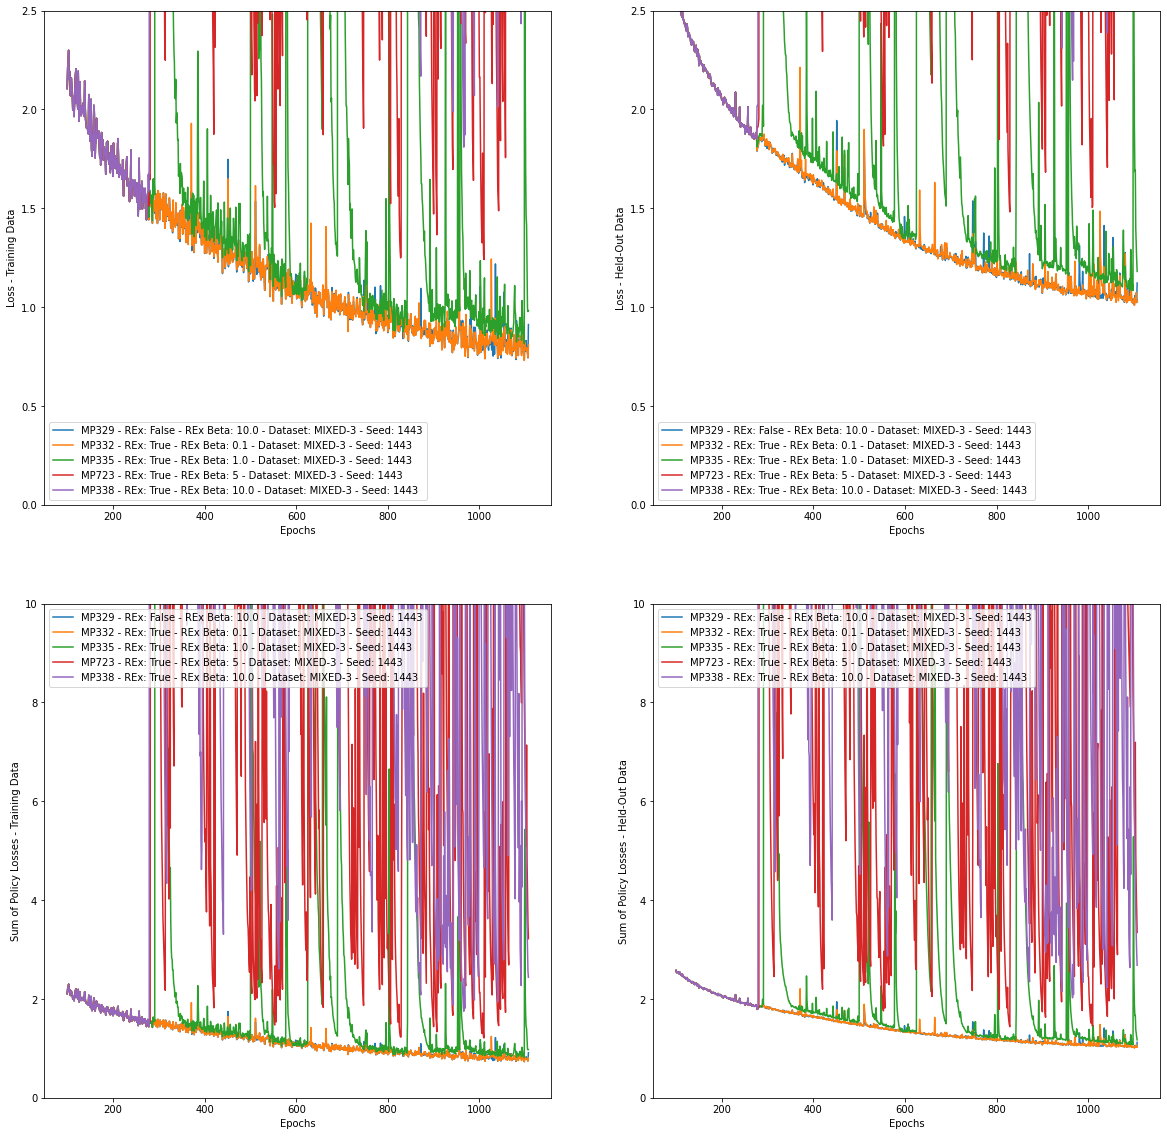

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP329,
    MP332,
    MP335,
    MP723,
    MP338,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

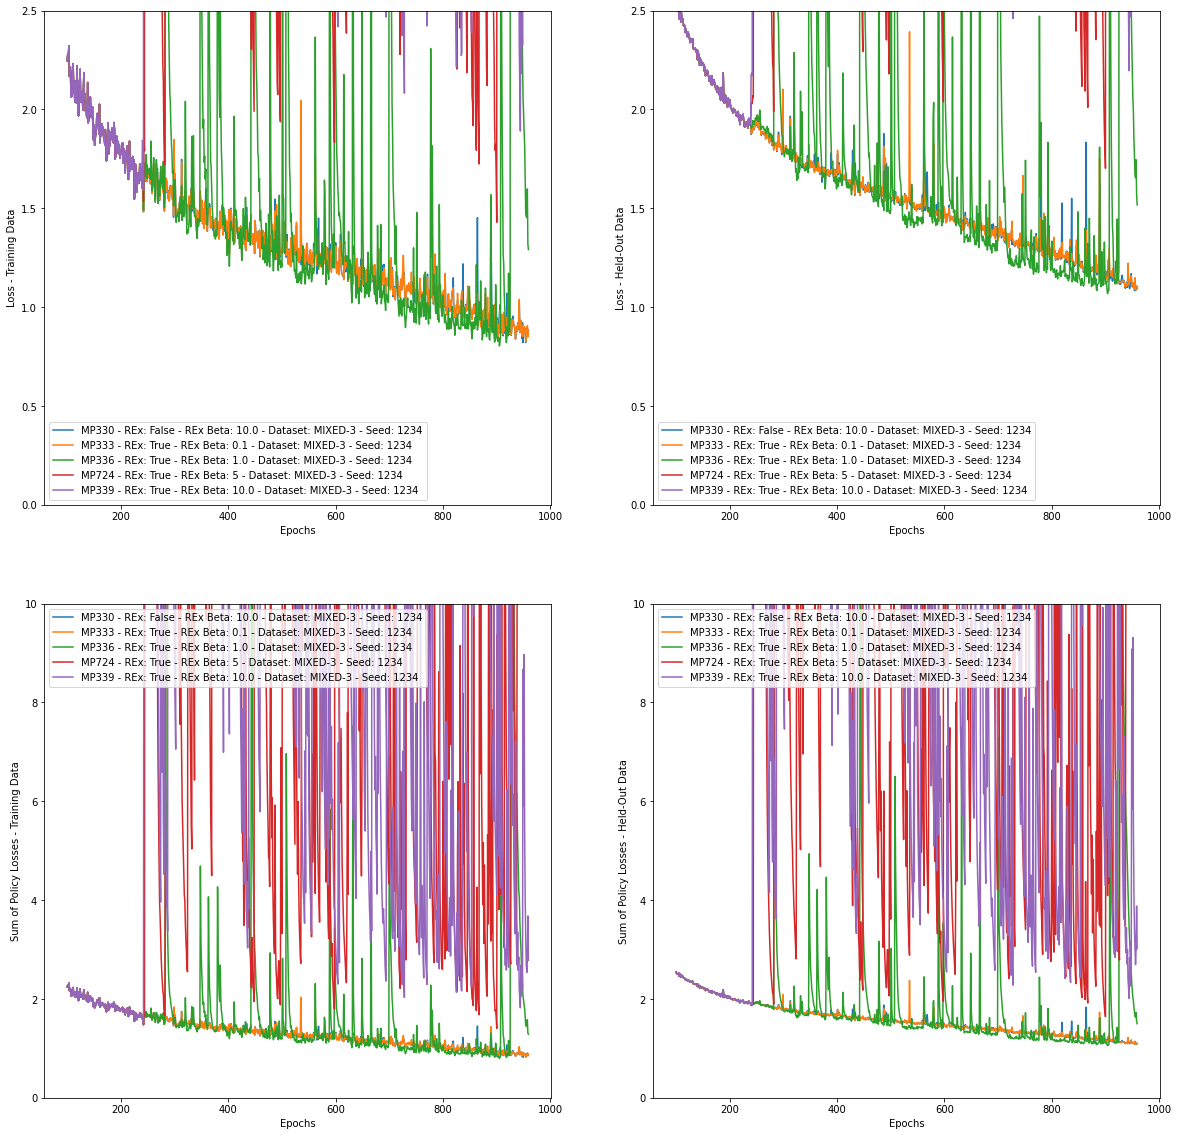

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP330,
    MP333,
    MP336,
    MP724,
    MP339,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

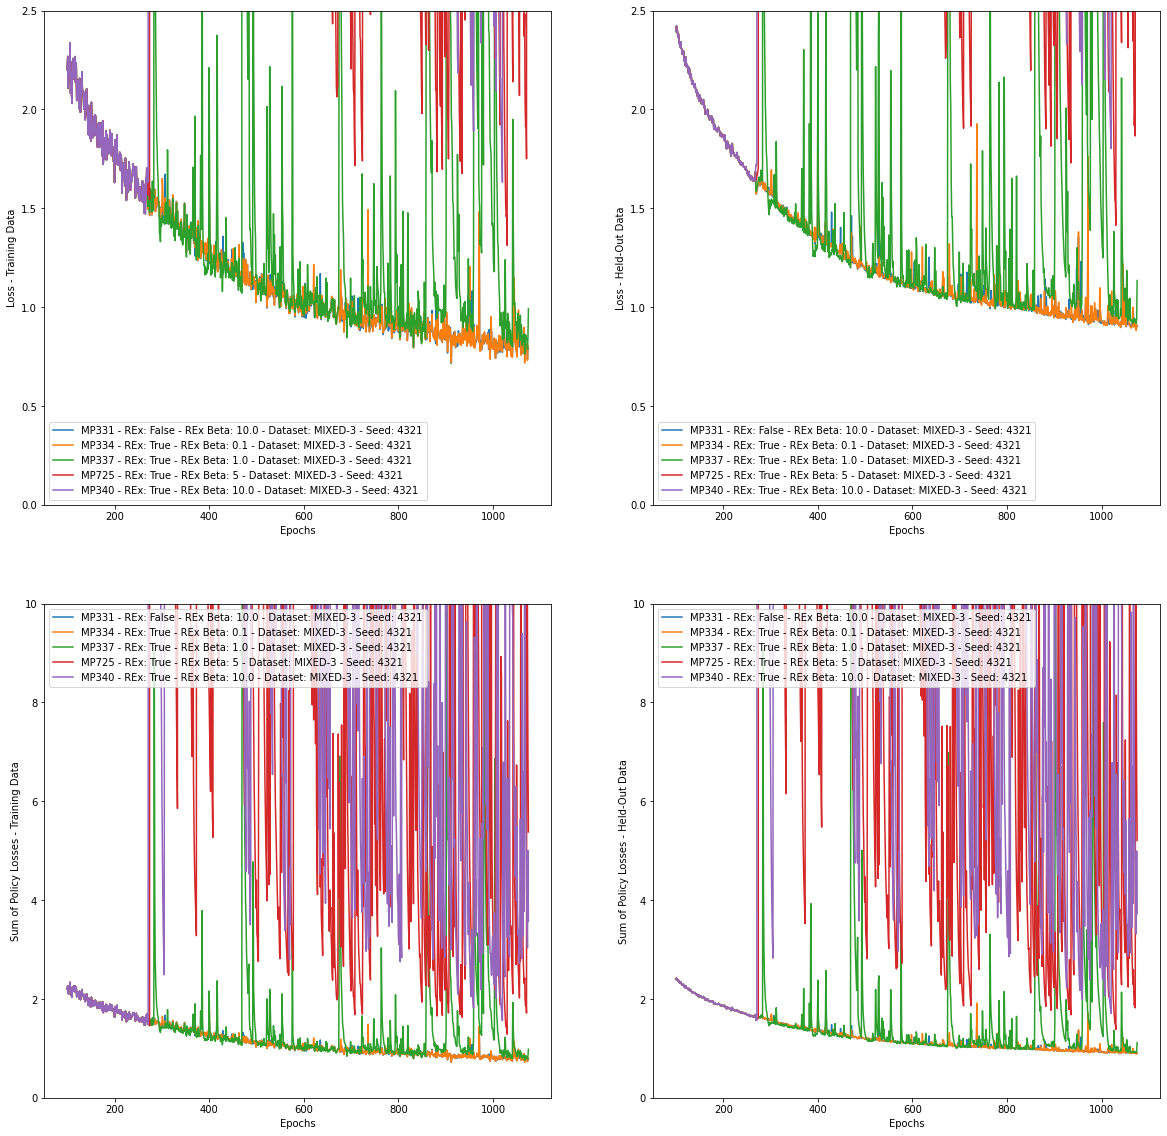

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP331,
    MP334,
    MP337,
    MP725,
    MP340,
]:
    ax[0,0].plot(exp.dynamics.model_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_ylabel('Loss - Training Data')
    ax[0,0].set_ylim(0,2.5)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].set_ylabel('Loss - Held-Out Data')
    ax[0,1].set_ylim(0,2.5)
    ax[0,1].legend()

    ax[1,0].plot(exp.dynamics.model_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_xlabel('Epochs')
    ax[1,0].set_ylabel('Sum of Policy Losses - Training Data')
    ax[1,0].set_ylim(0,10.)
    ax[1,0].legend()

    ax[1,1].plot(exp.dynamics.model_holdout_pol_total_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_xlabel('Epochs')
    ax[1,1].set_ylabel('Sum of Policy Losses - Held-Out Data')
    ax[1,1].set_ylim(0,10.)
    ax[1,1].legend()
pass

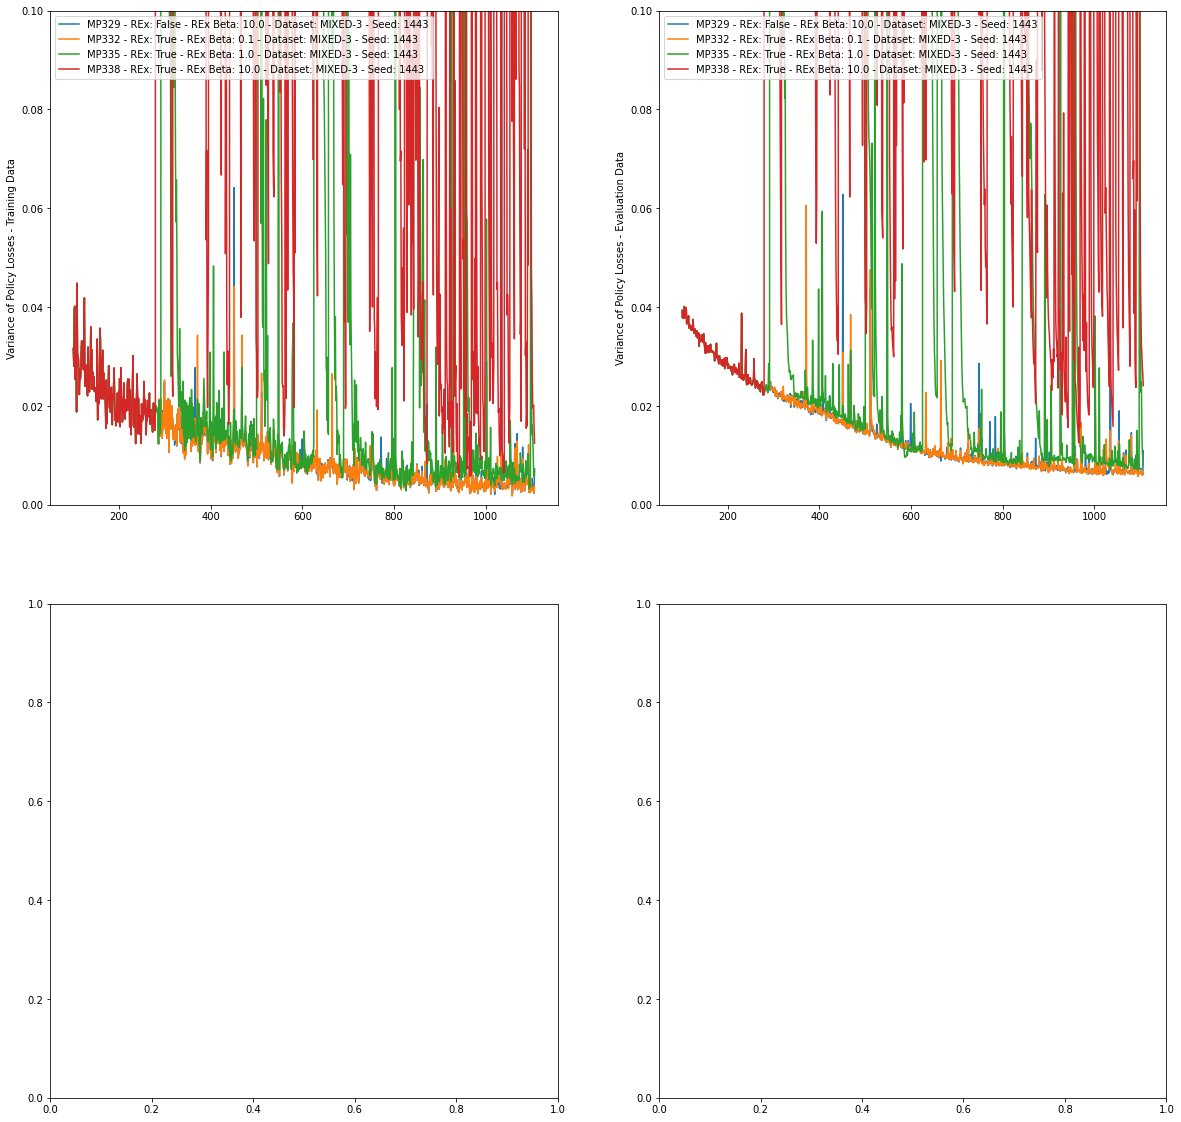

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP329, None), # MP329_details),
    (MP332, None), # MP332_details),
    (MP335, None), # MP335_details),
    (MP338, None), # MP338_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

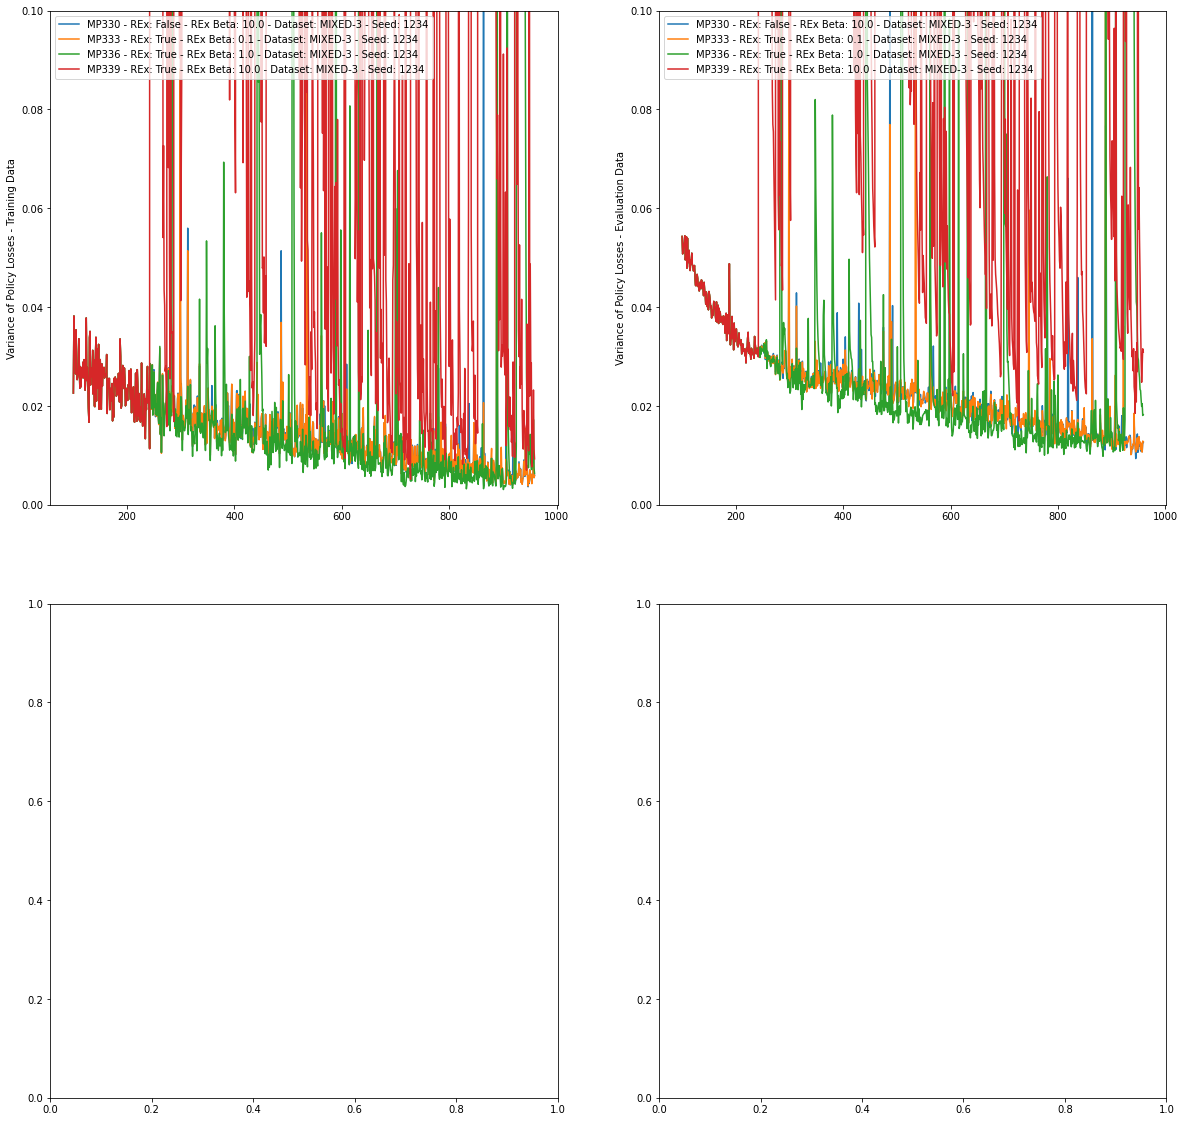

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP330, None), # MP330_details),
    (MP333, None), # MP333_details),
    (MP336, None), # MP336_details),
    (MP339, None), # MP339_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

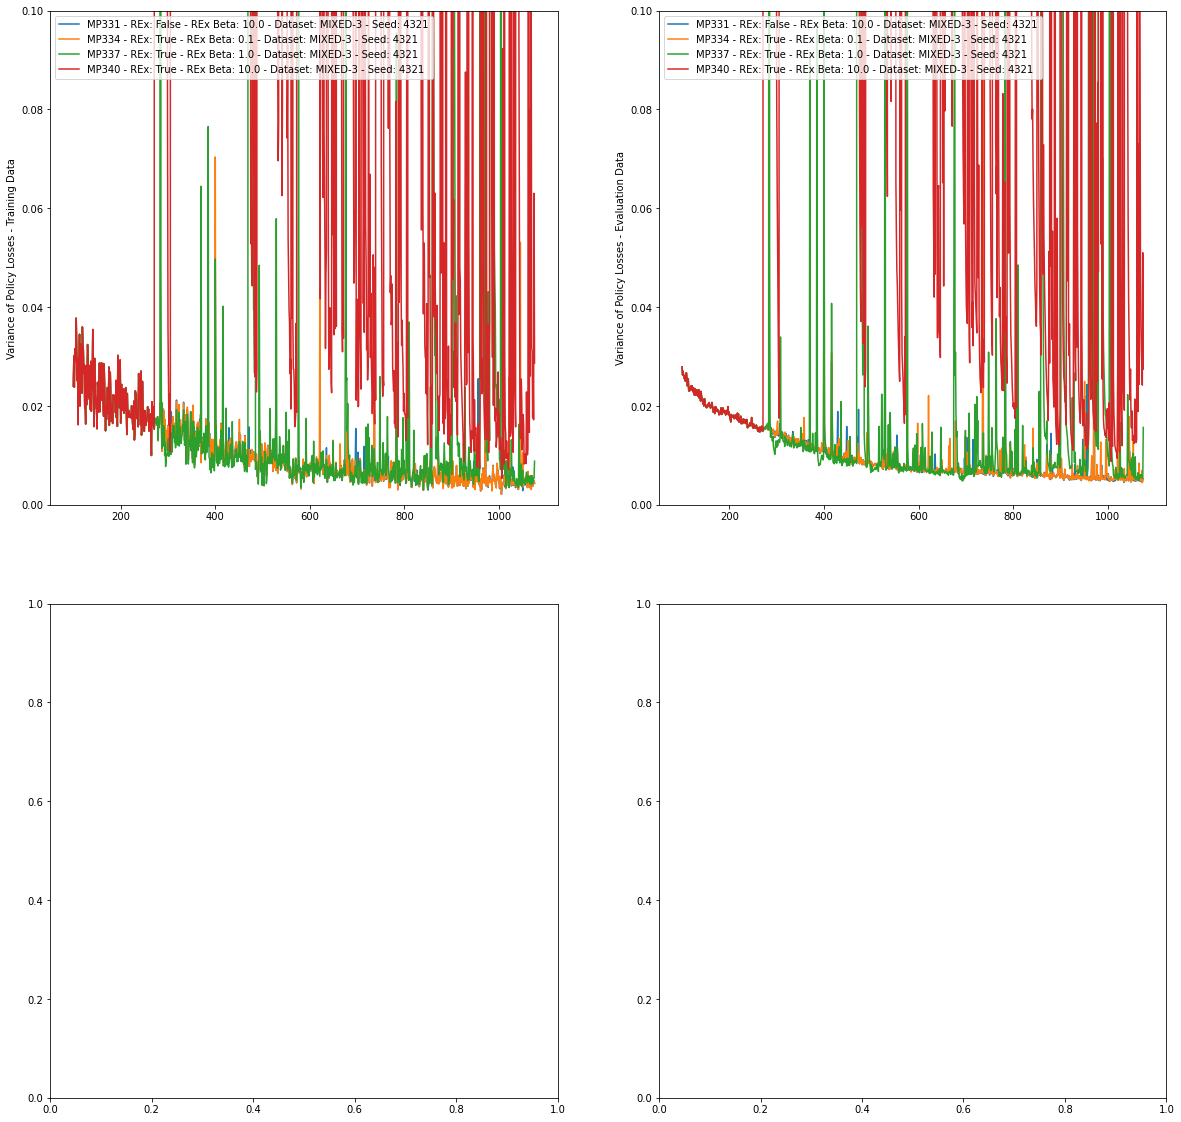

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp, exp_details in [
    (MP331, None), # MP331_details),
    (MP334, None), # MP334_details),
    (MP337, None), # MP337_details),
    (MP340, None), # MP340_details),
]:
    ax[0,0].plot(exp.dynamics.model_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Variance of Policy Losses - Training Data')
    ax[0,0].set_ylim(0,0.1)
    ax[0,0].legend()

    ax[0,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Variance of Policy Losses - Evaluation Data')
    ax[0,1].set_ylim(0,0.1)
    ax[0,1].legend()

    # ax[1,0].plot(exp.dynamics.model_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,0].set_ylabel('Variance of Policy Losses - Training Data')

    # ax[1,1].plot(exp.dynamics.model_holdout_pol_var_loss_history.values[:,exp_details.elites].mean(axis=1)[100:], label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    # ax[1,1].set_ylabel('Variance of Policy Losses - Evaluation Data')

    # for i in range(1):
    #     for j in range(2):
    #         ax[i,j].set_xlabel('Epochs')
    #         if j == 0:
    #             ax[i,j].set_ylim(0,0.003)
    #         else:
    #             ax[i,j].set_ylim(0,0.003)
    #         ax[i,j].legend()
pass

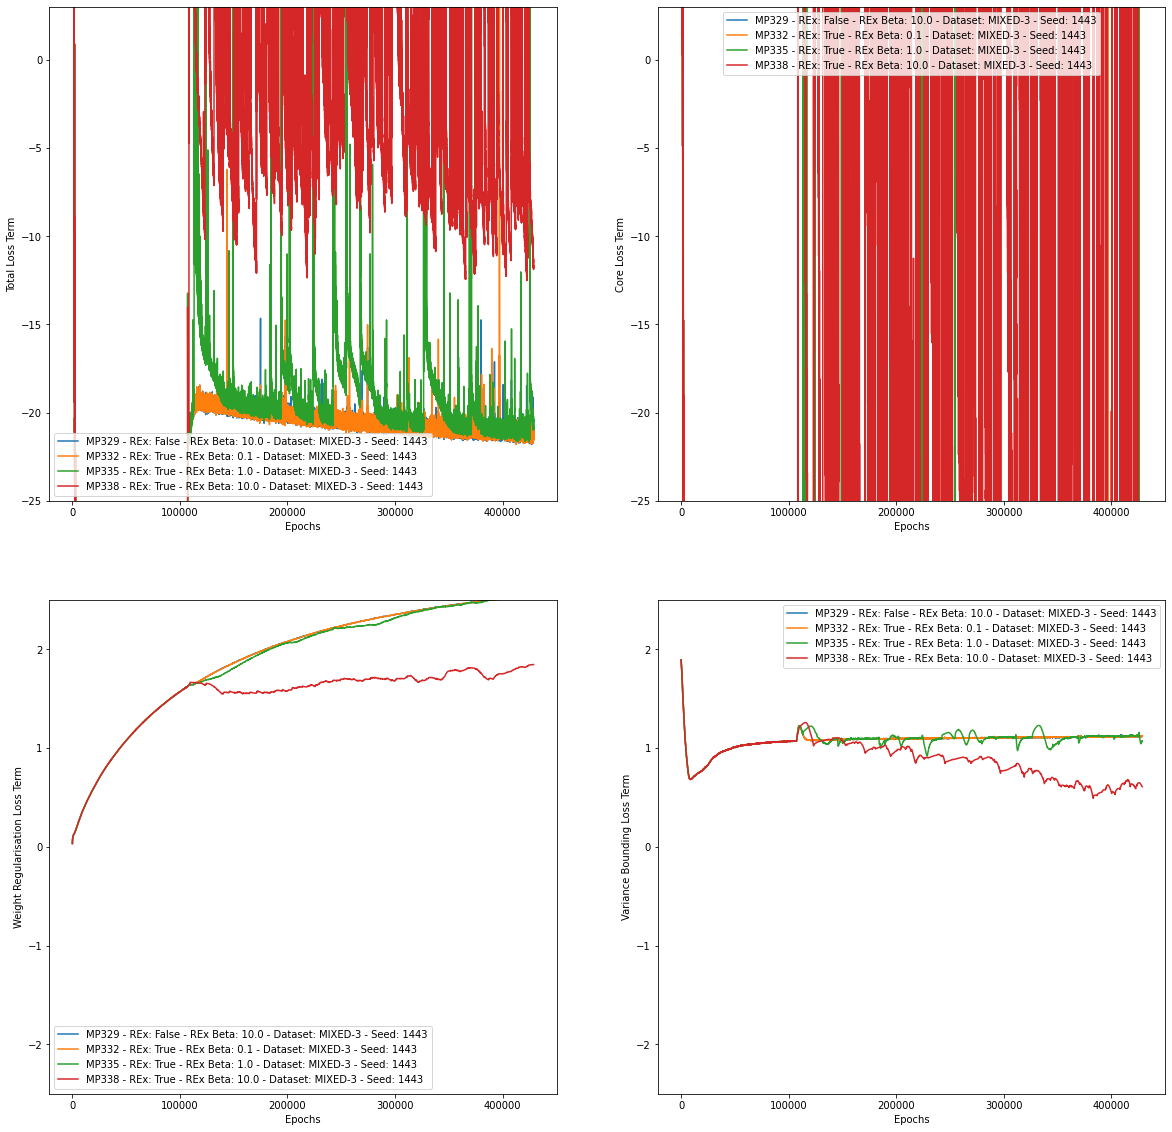

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP329,
    MP332,
    MP335,
    MP338,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

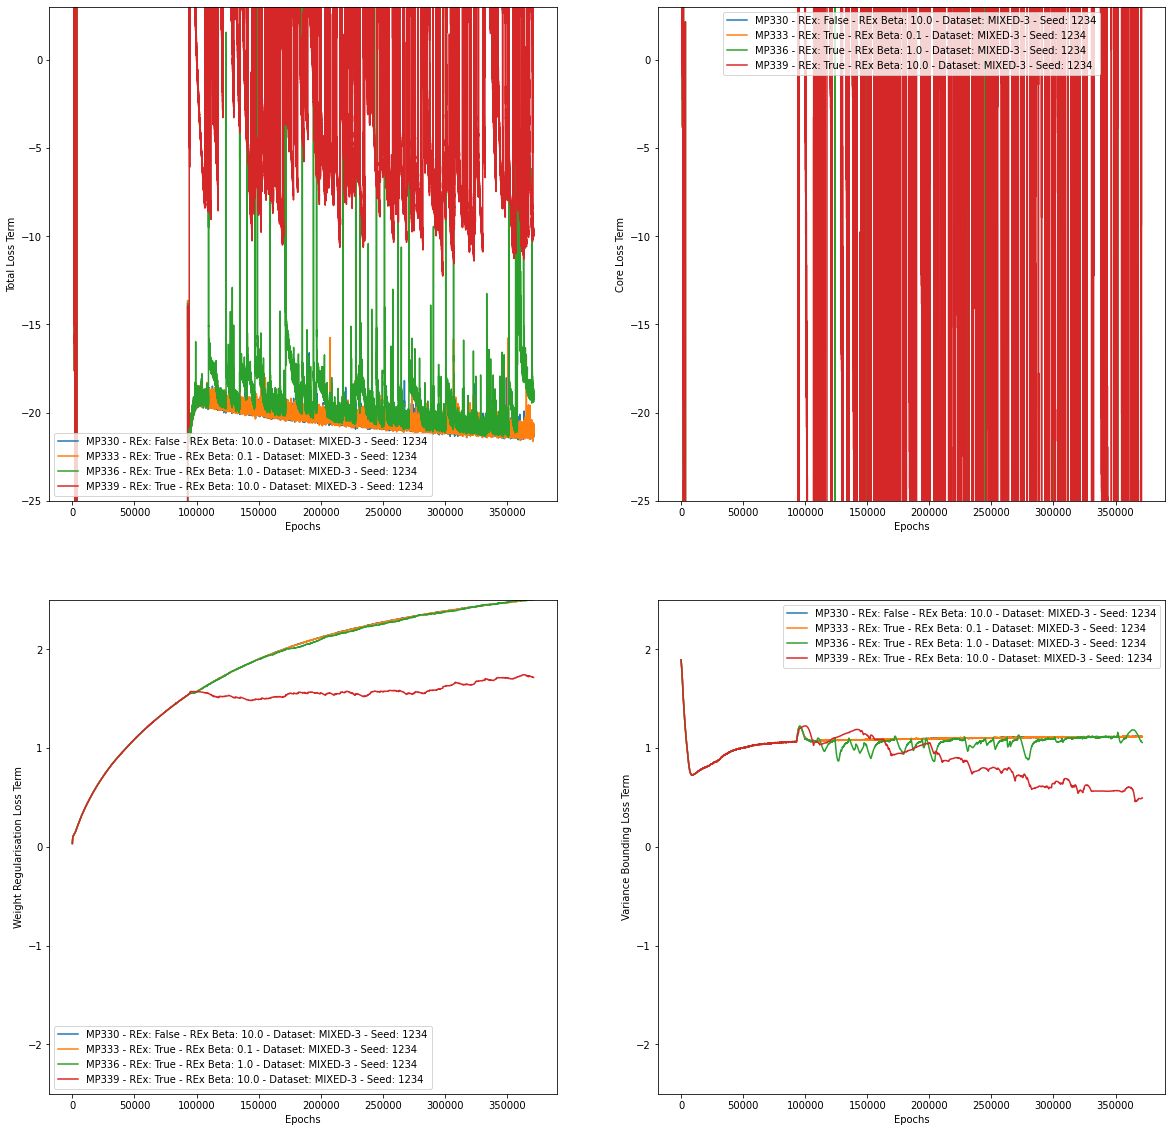

In [12]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP330,
    MP333,
    MP336,
    MP339,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

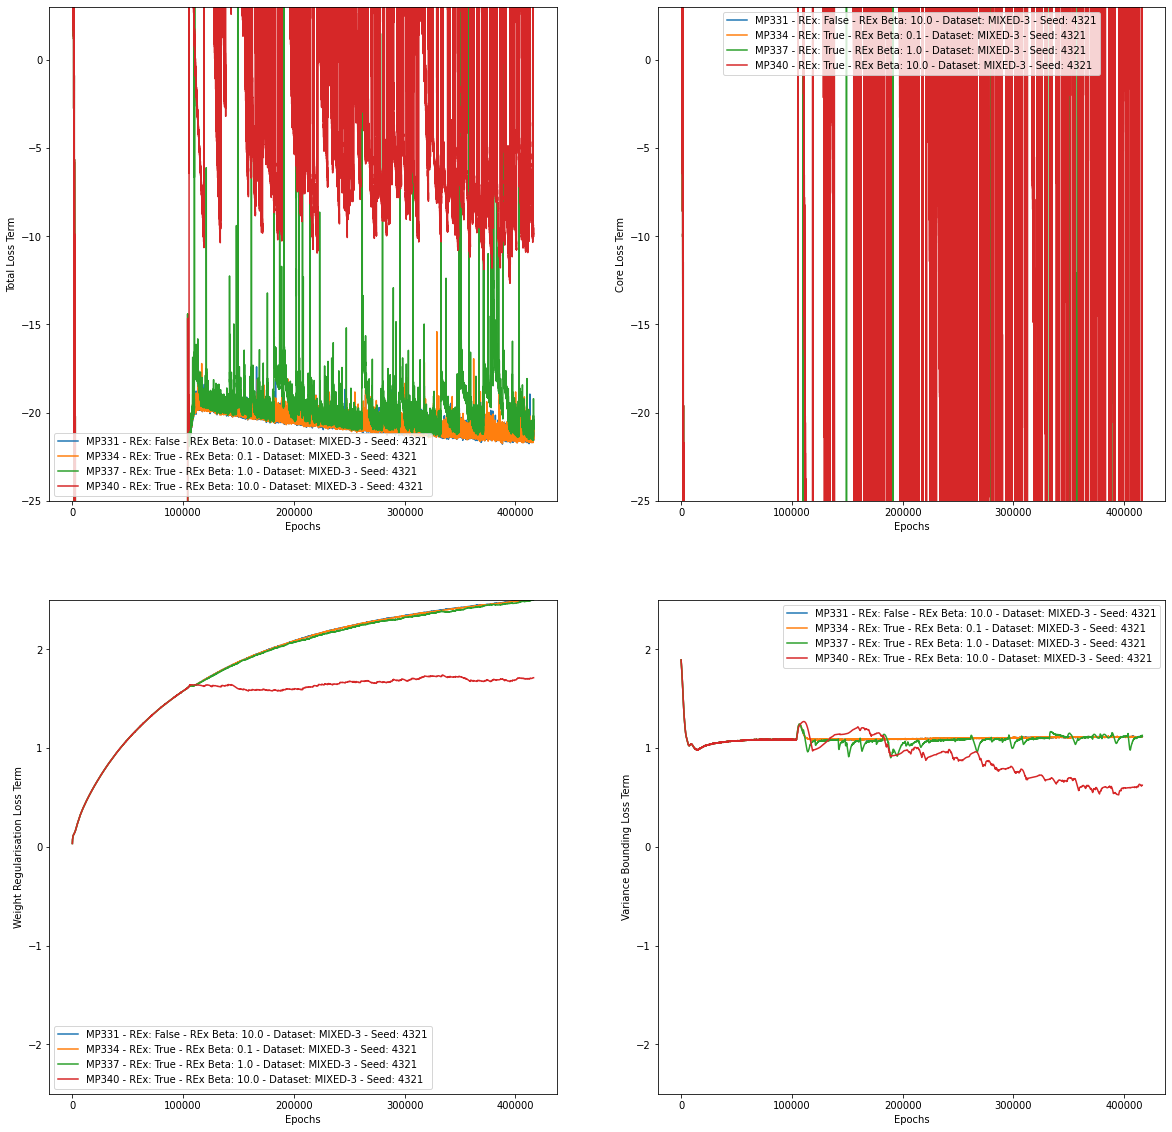

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
for exp in [
    MP331,
    MP334,
    MP337,
    MP340,
]:
    ax[0,0].plot(exp.dynamics.model_train_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,0].set_ylabel('Total Loss Term')

    ax[0,1].plot(exp.dynamics.model_train_core_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[0,1].set_ylabel('Core Loss Term')

    ax[1,0].plot(exp.dynamics.model_train_decay_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,0].set_ylabel('Weight Regularisation Loss Term')

    ax[1,1].plot(exp.dynamics.model_train_var_lim_loss_history, label=f'{exp.name} - REx: {exp.rex} - REx Beta: {exp.rex_beta} - Dataset: {exp.dataset} - Seed: {exp.seed}')
    ax[1,1].set_ylabel('Variance Bounding Loss Term')

    for i in range(2):
        for j in range(2):
            ax[i,j].set_xlabel('Epochs')
            if i == 0:
                ax[i,j].set_ylim(-25.,3.)
            else:
                ax[i,j].set_ylim(-2.5,2.5)
            ax[i,j].legend()
pass

In [ ]:
# No REx
MP329 = get_results("MP329")
MP330 = get_results("MP330")
MP331 = get_results("MP331")

# REx - 0.1
MP332 = get_results("MP332")
MP333 = get_results("MP333")
MP334 = get_results("MP334")

# REx - 1.0
MP335 = get_results("MP335")
MP336 = get_results("MP336")
MP337 = get_results("MP337")

# REx - 5.0
MP723 = get_results("MP723")
MP724 = get_results("MP724")
MP725 = get_results("MP725")

# REx - 10.0
MP338 = get_results("MP338")
MP339 = get_results("MP339")
MP340 = get_results("MP340")

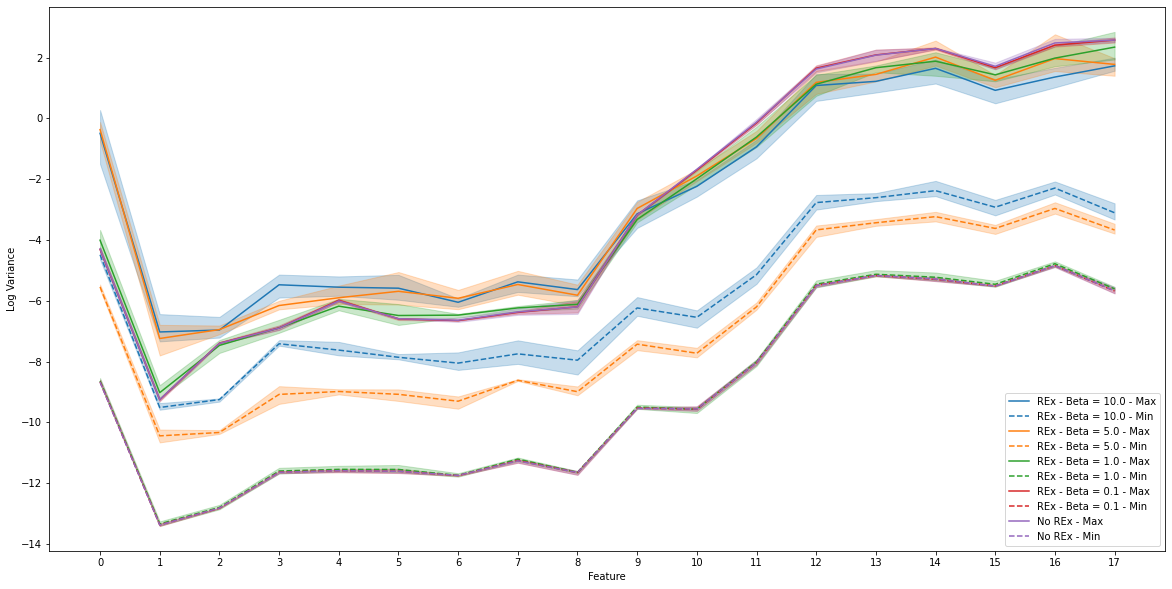

In [5]:
plot_min_max_logvars([
    ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
    ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
    ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
    ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
    ((MP329, MP330, MP331), 'No REx'),
])

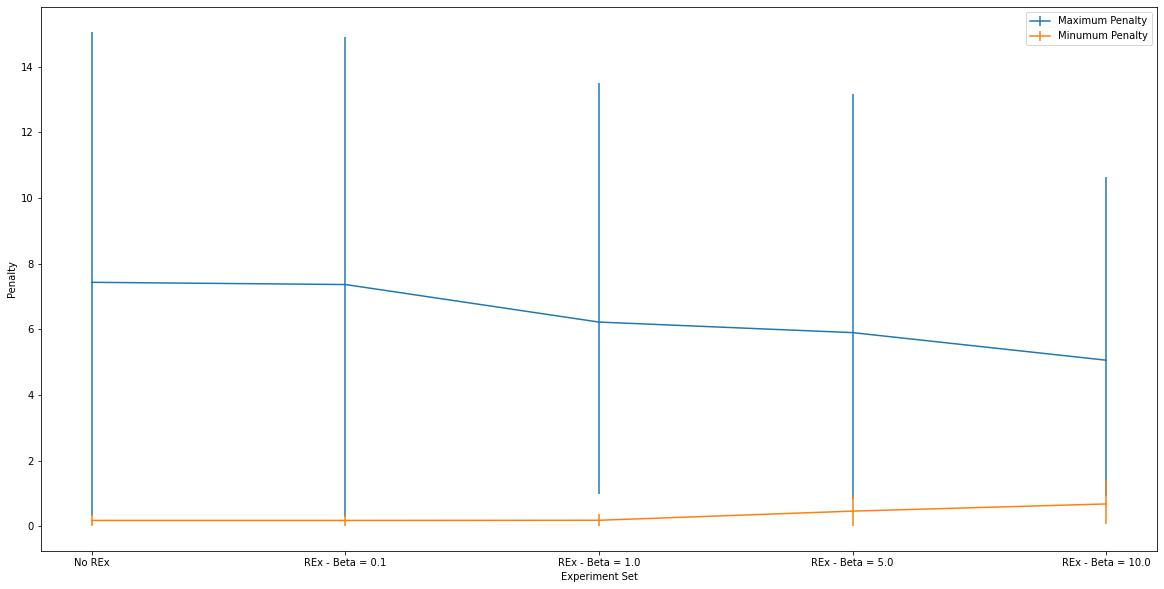

In [14]:
plot_min_max_penalty([
    ((MP329, MP330, MP331), 'No REx'),
    ((MP332, MP333, MP334), 'REx - Beta = 0.1'),
    ((MP335, MP336, MP337), 'REx - Beta = 1.0'),
    ((MP723, MP724, MP725), 'REx - Beta = 5.0'),
    ((MP338, MP339, MP340), 'REx - Beta = 10.0'),
])

In [7]:
# No REx
MP365 = get_results("MP365")
MP366 = get_results("MP366")
MP367 = get_results("MP367")
MP729 = get_results("MP729")
MP730 = get_results("MP730")

# REx - 0.1
MP368 = get_results("MP368")
MP369 = get_results("MP369")
MP370 = get_results("MP370")

# REx - 1.0
MP371 = get_results("MP371")
MP372 = get_results("MP372")
MP373 = get_results("MP373")

# REx - 5.0
MP726 = get_results("MP726")
MP727 = get_results("MP727")
MP728 = get_results("MP728")

# REx - 10.0
MP374 = get_results("MP374")
MP375 = get_results("MP375")
MP376 = get_results("MP376")
MP731 = get_results("MP731")
MP732 = get_results("MP732")

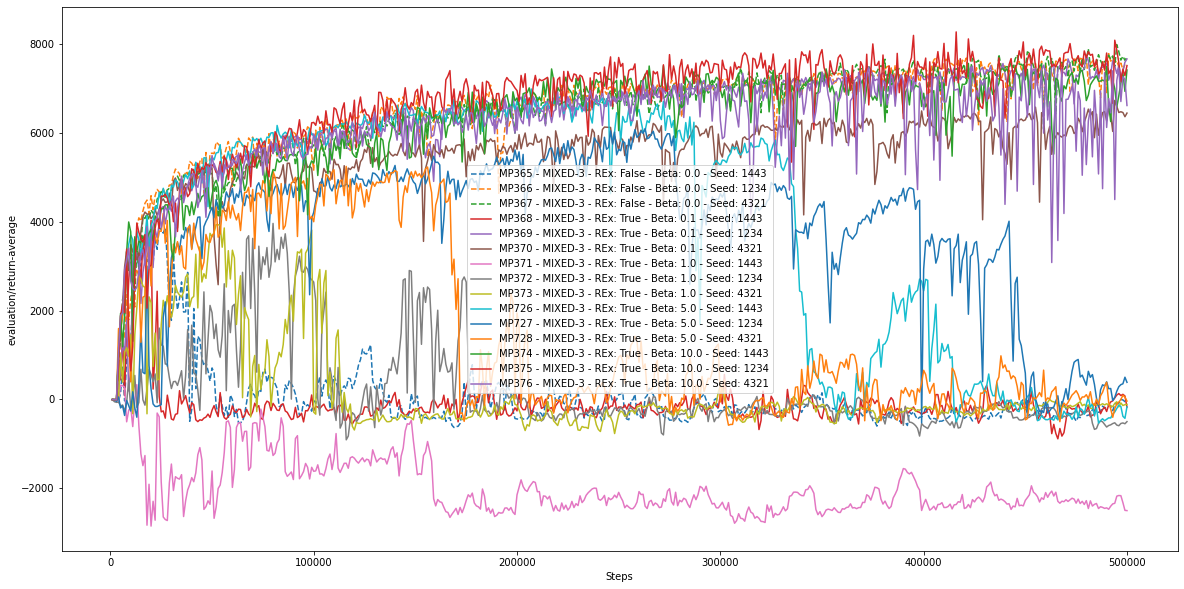

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP368, True, 0.1),
    (MP369, True, 0.1),
    (MP370, True, 0.1),
    (MP371, True, 1.0),
    (MP372, True, 1.0),
    (MP373, True, 1.0),
    (MP726, True, 5.0),
    (MP727, True, 5.0),
    (MP728, True, 5.0),
    (MP374, True, 10.0),
    (MP375, True, 10.0),
    (MP376, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

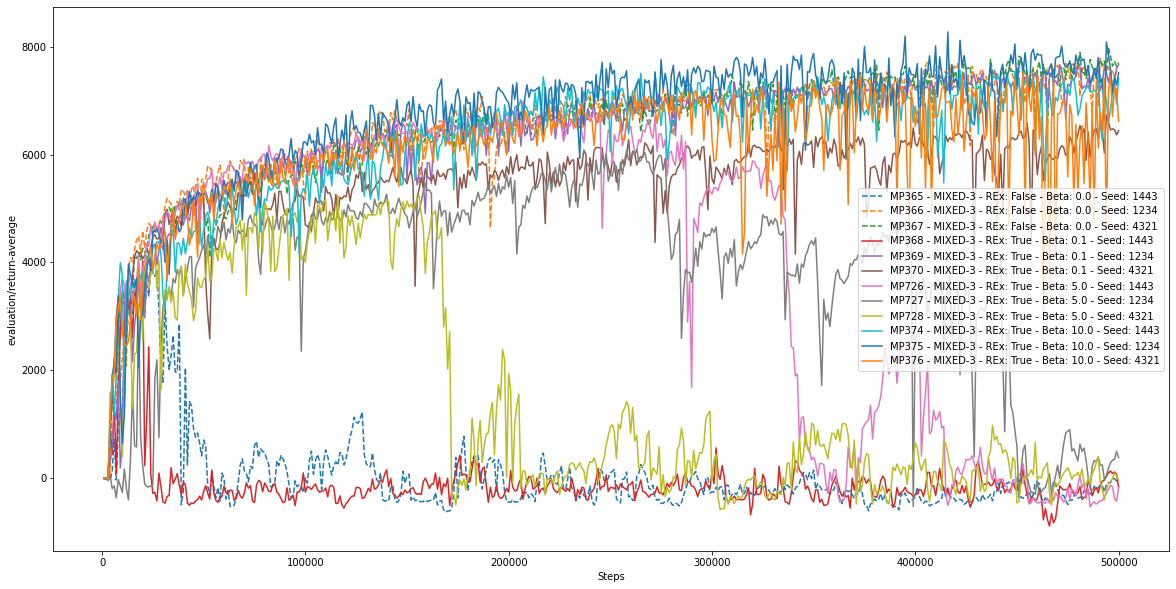

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP368, True, 0.1),
    (MP369, True, 0.1),
    (MP370, True, 0.1),
    # (MP371, True, 1.0),
    # (MP372, True, 1.0),
    # (MP373, True, 1.0),
    (MP726, True, 5.0),
    (MP727, True, 5.0),
    (MP728, True, 5.0),
    (MP374, True, 10.0),
    (MP375, True, 10.0),
    (MP376, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

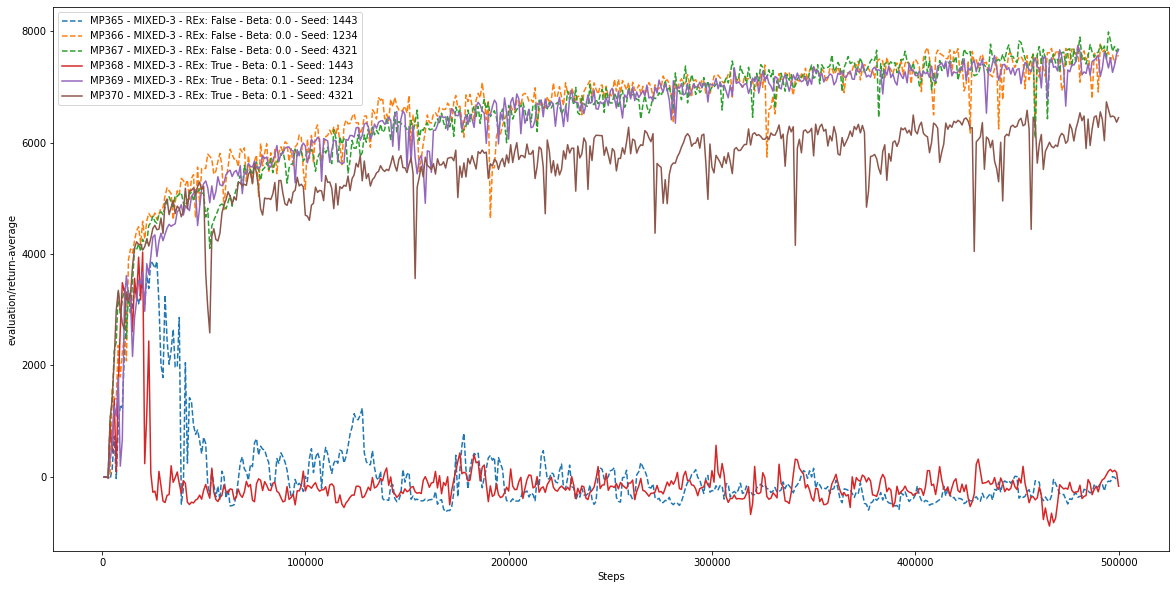

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP368, True, 0.1),
    (MP369, True, 0.1),
    (MP370, True, 0.1),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

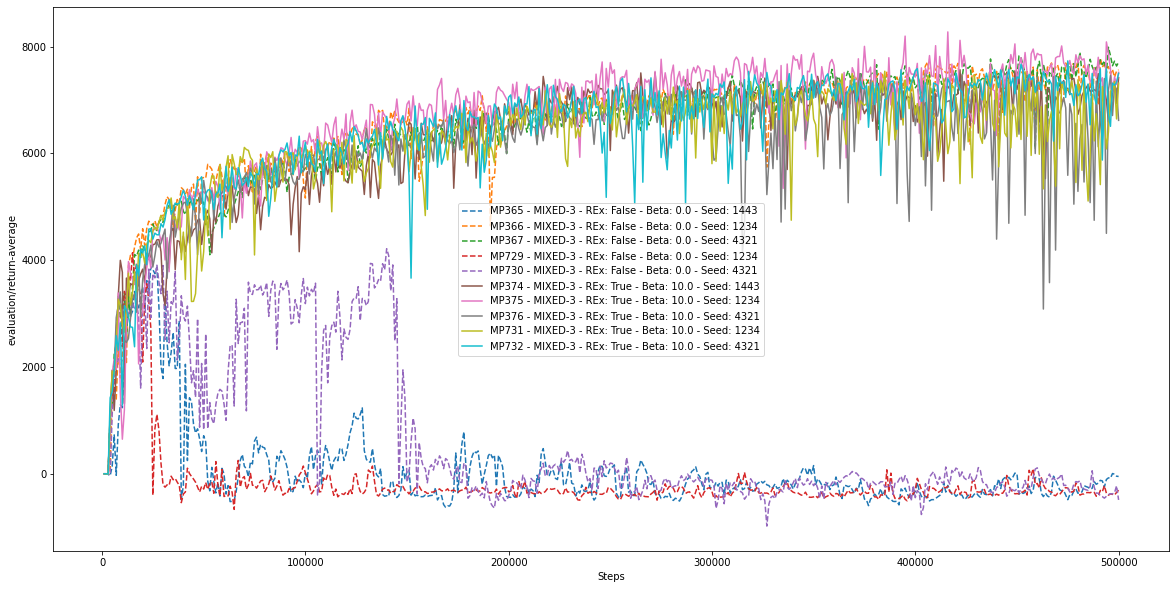

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp, rex, beta in [
    (MP365, False, 0.0),
    (MP366, False, 0.0),
    (MP367, False, 0.0),
    (MP729, False, 0.0),
    (MP730, False, 0.0),
    (MP374, True, 10.0),
    (MP375, True, 10.0),
    (MP376, True, 10.0),
    (MP731, True, 10.0),
    (MP732, True, 10.0),
]:
    ax.plot(
        exp.sac.result['timesteps_total'], exp.sac.result[feature], ls='--' if not rex else '-', label=f'{exp.name} - {exp.dataset} - REx: {rex} - Beta: {beta} - Seed: {exp.seed}'
    )
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
ax.legend()
pass

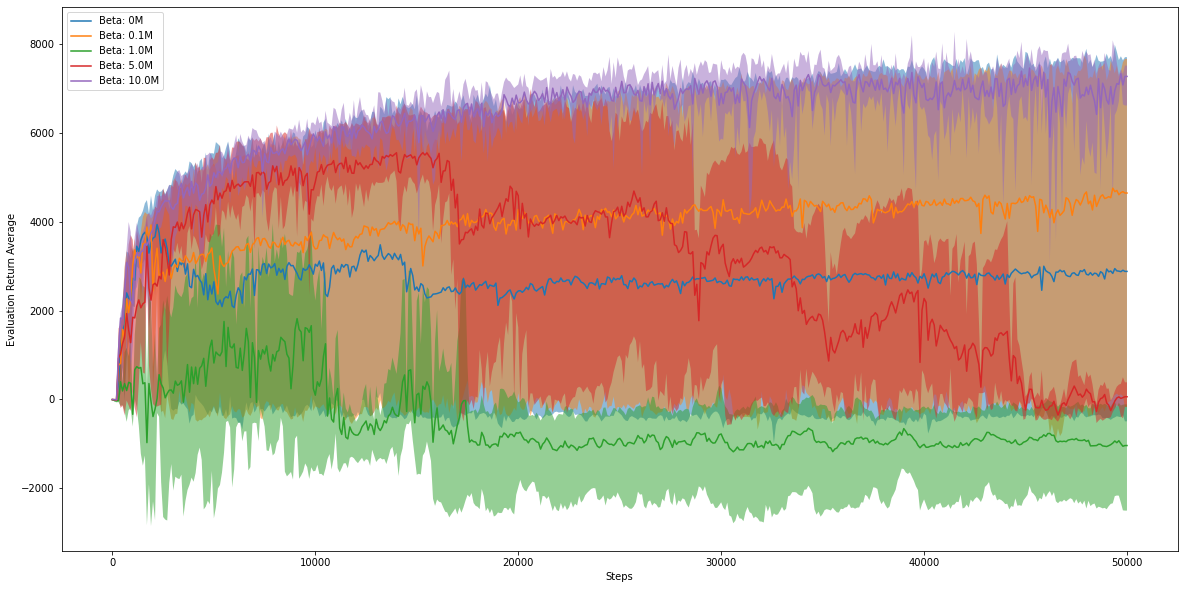

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP365, MP366, MP367, MP729, MP730), '0'),
    ((MP368, MP369, MP370), '0.1'),
    ((MP371, MP372, MP373), '1.0'),
    ((MP726, MP727, MP728), '5.0'),
    ((MP374, MP375, MP376, MP731, MP732), '10.0'),
]:
    comb_arr = np.vstack(list(zip_longest(*[
        exp.sac.result[feature] for exp in exp_set
        ],
        fillvalue=np.NaN
    )))
    mean_arr = np.nanmean(comb_arr, axis=-1)
    min_arr = np.nanmin(comb_arr, axis=-1)
    max_arr = np.nanmax(comb_arr, axis=-1)
    x_vals = np.arange(len(mean_arr))*100
    ax.plot(x_vals, mean_arr, label=f'Beta: {steps}M')
    ax.fill_between(x_vals, min_arr, max_arr, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel('Evaluation Return Average')
# ax.set_xlim(-1000,501000)
# ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass

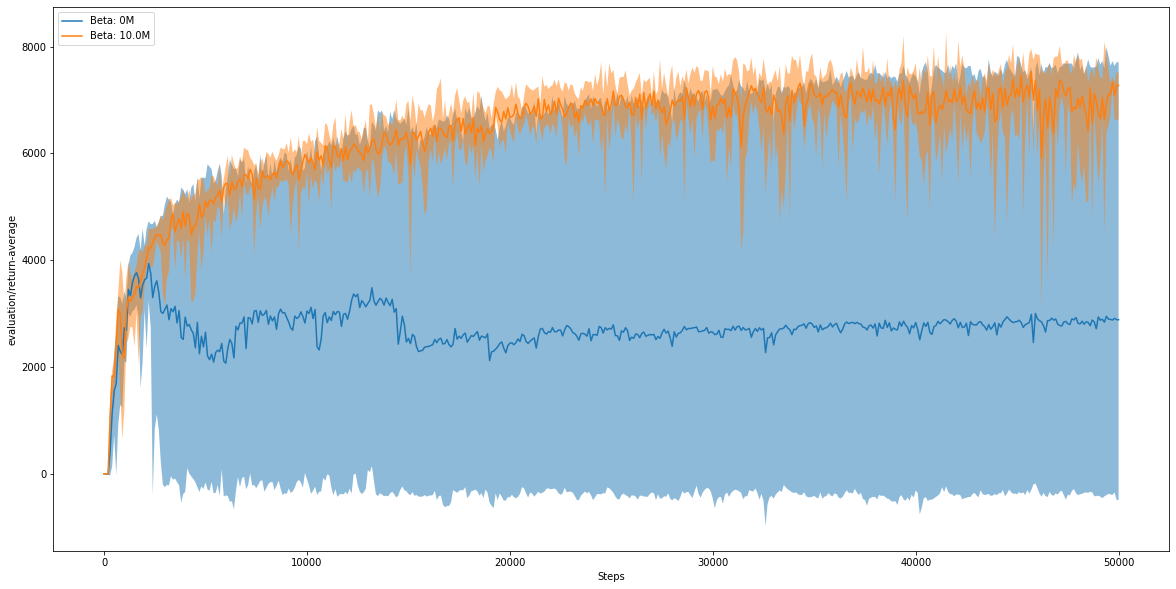

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))

feature = 'evaluation/return-average'
for exp_set, steps in [
    ((MP365, MP366, MP367, MP729, MP730), '0'),
    ((MP374, MP375, MP376, MP731, MP732), '10.0'),
]:
    comb_arr = np.vstack(list(zip_longest(*[
        exp.sac.result[feature] for exp in exp_set
        ],
        fillvalue=np.NaN
    )))
    mean_arr = np.nanmean(comb_arr, axis=-1)
    min_arr = np.nanmin(comb_arr, axis=-1)
    max_arr = np.nanmax(comb_arr, axis=-1)
    x_vals = np.arange(len(mean_arr))*100
    ax.plot(x_vals, mean_arr, label=f'Beta: {steps}M')
    ax.fill_between(x_vals, min_arr, max_arr, alpha=0.5)
ax.set_xlabel('Steps')
ax.set_ylabel(feature)
# ax.set_xlim(-1000,501000)
# ax.set_ylim(-3000,12500)
ax.legend(loc='upper left')
pass